# PPL 

# Modeling

<br>
<hr>

<h1 style="color:red"> Index</h1>

<br>

### 0. Setup

### 1. Dataset

### 2. Models

- #### 2.1 Neural Network

- #### 2.2 Decision Tree Regressor

- #### 2.3 Random Forest Regressor

- #### 2.4 XGBoost

- #### 2.5 Bayesian Ridge

- #### 2.6 Linear Regression

- #### 2.7 Logistic Regression

### 3. Summary

### 4. Feature Importance

### 5. Error along Time

<hr>
<br><br><br>

# 0. Setup

In [1]:
# set root folder (needed for imports)
import os
while not os.getcwd().endswith("ppl-model"):
    os.chdir("..")

# larger page width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# detect changes on folders
%load_ext autoreload
%autoreload 2

# ignore warning on jupyter
import warnings
warnings.filterwarnings('ignore')

# my imports
import settings
from dskc import dskc_clean
from dskc import dskc_exploration
from dskc import dskc_graphs
from src.modeling.models import * 
from src.modeling import visualization

from src.modeling import magic_loop

# third party imports
import pandas as pd
import numpy as np

Using TensorFlow backend.


# 1. Dataset

<hr>

In [4]:
from src.modeling import util
from dskc import dskc_terminal

x_train, y_train, feature_names = util.read_train_data()
print(x_train.shape)
for i,x in enumerate(feature_names):
    print(i,x)

(97828, 74)
0 title_prj_summary_topic_1
1 title_prj_summary_topic_2
2 title_prj_summary_topic_3
3 title_prj_summary_topic_4
4 title_prj_summary_topic_5
5 title_prj_summary_topic_6
6 title_length
7 channel
8 start_month
9 start_month_sin
10 start_month_cos
11 start_day
12 start_day_sin
13 start_day_cos
14 start_weekday
15 start_weekday_sin
16 start_weekday_cos
17 end_month
18 end_month_sin
19 end_month_cos
20 end_day
21 end_day_sin
22 end_day_cos
23 end_weekday
24 days
25 days_elapsed
26 percentage_days_elapsed
27 end_weekday_sin
28 end_weekday_cos
29 target
30 raised
31 percentage_raised
32 backers
33 amount_self_funded
34 percentage_target_self_funded
35 comments
36 images
37 views
38 facebook
39 uncond_channel
40 cat_agro-indústria
41 cat_alimentação/bebidas
42 cat_ambiente
43 cat_artes_plásticas
44 cat_cidadania_/_política
45 cat_ciência/tecnologia
46 cat_dança/cinema/teatro
47 cat_desporto
48 cat_educação
49 cat_empreendedorismo
50 cat_evento
51 cat_jogos
52 cat_livros/revistas
53 

<br>

# 2. Models





<br>

# 2.1 Neural Network

<hr>


<br><br>

## 2.1.1 Exploration Training

In [6]:
nnet_model = nnet.test_models(1,10,sep=1,epochs=35)


Neurons 1 - start


AttributeError: 'int' object has no attribute 'shape'

<br>

## 2.1.2 Exploration Visualization

## Accuracy

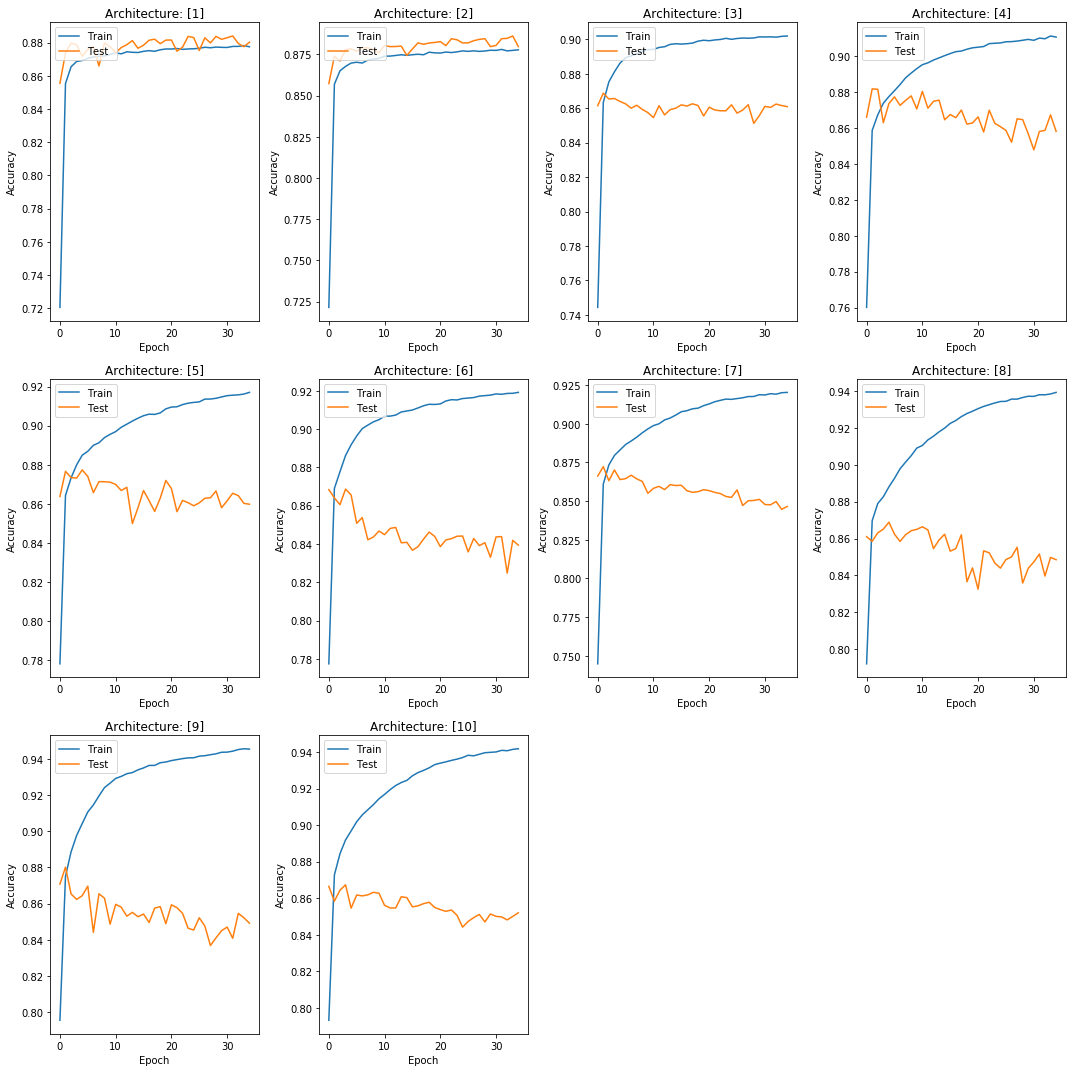

## Loss

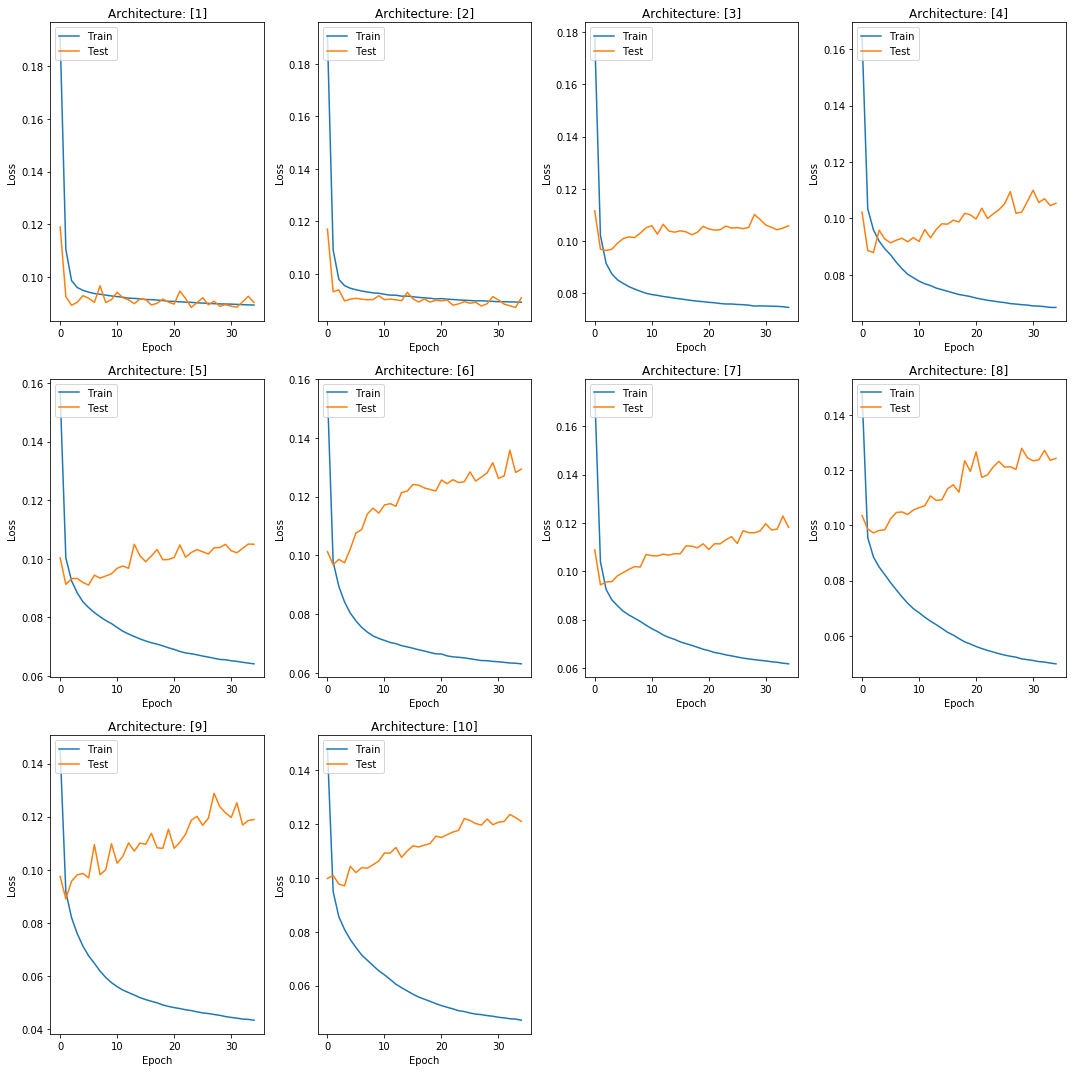

## Metrics Table


| Neurons   |   Accuracy |   Max Accuracy |   Epoch Max Acc. |   Loss |   Min Loss |   Epoch Min Loss |
|-----------|------------|----------------|------------------|--------|------------|------------------|
| [1]       |      0.88  |          0.884 |               32 |  0.09  |      0.088 |               24 |
| [2]       |      0.88  |          0.886 |               34 |  0.091 |      0.087 |               34 |
| [3]       |      0.861 |          0.869 |                2 |  0.106 |      0.096 |                3 |
| [4]       |      0.858 |          0.882 |                2 |  0.105 |      0.088 |                3 |
| [5]       |      0.86  |          0.877 |                5 |  0.105 |      0.091 |                6 |
| [6]       |      0.839 |          0.869 |                4 |  0.129 |      0.097 |                2 |
| [7]       |      0.847 |          0.872 |                2 |  0.118 |      0.094 |                2 |
| [8]       |      0.848 |          0.869 |                5 | 

In [10]:
nnet.display_models_exploration()

<br><br>

## 2.1.3 Train

In [3]:
nnet_model = nnet.train(neurons=[2],epochs=3,retrain=None,optimizer="adadelta")


/home/ppl/Documents/dataset/processed/train.csv


/home/miguel/.local/lib/python3.6/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/home/miguel/.local/lib/python3.6/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()



Train on 97828 samples, validate on 22859 samples
Epoch 1/3
97828/97828 [==============================] - 21s 219us/step - loss: 0.1313 - accuracy: 0.8156 - val_loss: 0.0844 - val_accuracy: 0.8856
Epoch 2/3
97828/97828 [==============================] - 21s 216us/step - loss: 0.0947 - accuracy: 0.8673 - val_loss: 0.0881 - val_accuracy: 0.8797
Epoch 3/3
97828/97828 [==============================] - 21s 211us/step - loss: 0.0933 - accuracy: 0.8706 - val_loss: 0.0842 - val_accuracy: 0.8882
Elapsed time: 1m 4s
saving model... done
Saved as /home/miguel/ppl-model/model/model.h5


In [5]:
nnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 150       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________



<br><br>
## 2.1.4 Load Model

In [4]:
nnet_model=nnet.load_model()



<br>

## 2.1.5 Test

### Performance Metrics and Errors

| Algorithm      |   Accuracy |   Precision |   Recall |    F1 |   Mean Squared Error |   Cross-Entropy |   R^2 |
|----------------|------------|-------------|----------|-------|----------------------|-----------------|-------|
| Neural Network |      86.94 |       88.11 |    81.79 | 84.83 |                0.093 |            0.35 | 0.625 |

### Classification Report


              precision    recall  f1-score   support

           0       0.86      0.91      0.89     12648
           1       0.88      0.82      0.85     10211

    accuracy                           0.87     22859
   macro avg       0.87      0.86      0.87     22859
weighted avg       0.87      0.87      0.87     22859






### Predictions

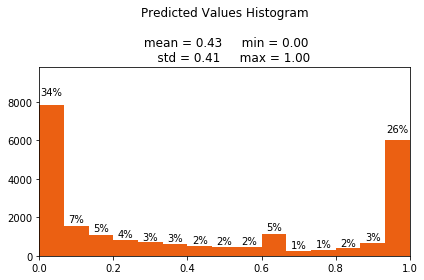

### Predictions Accuracy

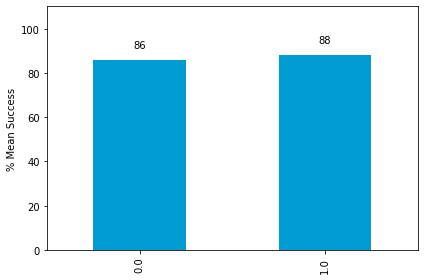

In [9]:
nnet.test(nnet_model).display()

<br><br>
<br>

# 2.2 Decision Tree Regressor

<hr>


<br>

## 2.2.1 Train

In [10]:
dtree_model = dtree.train(search=False,max_depth=4)

Elapsed time: 0m 1s
saving model... done


<br>

## 2.2.2 Load Model

In [19]:
dtree_model = dtree.load_model()

<br>

## 2.2.3 Test

In [12]:
dtree.test(dtree_model).display()

NameError: name 'dtree_model' is not defined

<br><br>
<br>

# 2.3 Random Forest Regressor

<hr>



<br>

## 2.3.1 Train

In [37]:
random_forest_regressor_model = random_forest_regressor.train(search=False)

Elapsed time: 2m 3s
saving model... done



<br>

## 2.3.2 Load model

In [26]:
random_forest_regressor_model = random_forest_regressor.load_model()

<br>

## 2.3.3 Test

### Performance Metrics and Errors

| Algorithm               |   Accuracy |   Precision |   Recall |    F1 |   Mean Squared Error |   Cross-Entropy |   R^2 |
|-------------------------|------------|-------------|----------|-------|----------------------|-----------------|-------|
| Random Forest Regressor |      87.22 |       88.17 |    82.58 | 85.28 |                0.095 |           0.493 | 0.616 |

### Classification Report


              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     13316
         1.0       0.88      0.83      0.85     10822

    accuracy                           0.87     24138
   macro avg       0.87      0.87      0.87     24138
weighted avg       0.87      0.87      0.87     24138






### Predictions

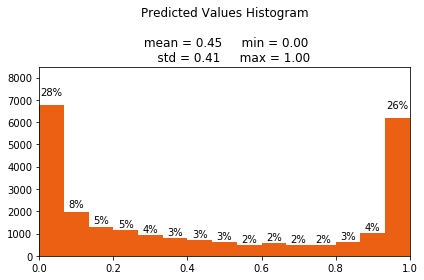

### Predictions Accuracy

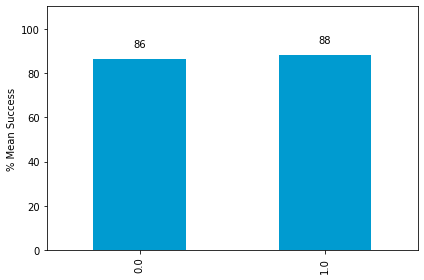

In [5]:
random_forest_regressor.test(random_forest_regressor_model).display()


<br><br>
<br>


# 2.4 XGBoost

<hr>


<br>

## 2.4.1 Train

In [38]:
xgboost_model = xgboost.train(search=False)

Elapsed time: 0m 13s
saving model... done


<br>

## 2.4.2 Load Model

In [13]:
xgboost_model = xgboost.load_model()

<br>

## 2.4.3 Test

### Performance Metrics and Errors

| Algorithm         |   Accuracy |   Precision |   Recall |    F1 |   Mean Squared Error |   Cross-Entropy |   R^2 |
|-------------------|------------|-------------|----------|-------|----------------------|-----------------|-------|
| XGBoost Regressor |      86.09 |       88.53 |    79.24 | 83.63 |                0.108 |           0.718 | 0.563 |

### Classification Report


              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     13316
         1.0       0.89      0.79      0.84     10822

    accuracy                           0.86     24138
   macro avg       0.86      0.85      0.86     24138
weighted avg       0.86      0.86      0.86     24138






### Predictions

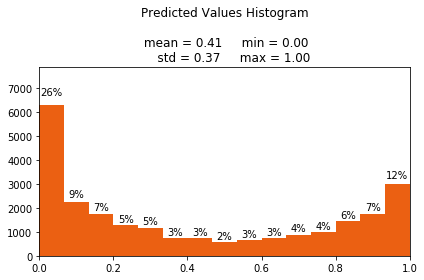

### Predictions Accuracy

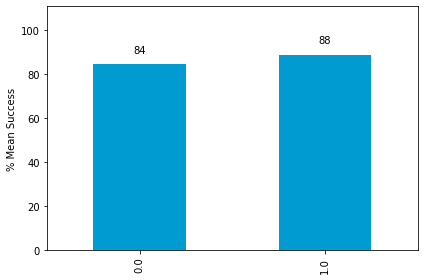

In [7]:
xgboost.test(xgboost_model).display()

<br><br>
<br>

# 2.5. Bayesian Ridge

<hr>


<br>

## 2.5.1 Train

In [39]:
bayesian_ridge_model = bayesian_ridge.train()

Elapsed time: 0m 1s
saving model... done


<br>

## 2.5.2 Test

### Performance Metrics and Errors

| Algorithm      |   Accuracy |   Precision |   Recall |    F1 |   Mean Squared Error |   Cross-Entropy |   R^2 |
|----------------|------------|-------------|----------|-------|----------------------|-----------------|-------|
| Bayesian Ridge |      84.46 |       93.27 |    70.42 | 80.25 |                0.117 |            0.39 | 0.526 |

### Classification Report


              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87     13316
         1.0       0.93      0.70      0.80     10822

    accuracy                           0.84     24138
   macro avg       0.87      0.83      0.84     24138
weighted avg       0.86      0.84      0.84     24138






### Predictions

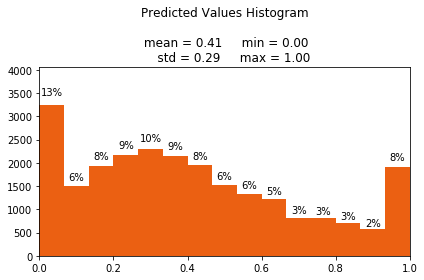

### Predictions Accuracy

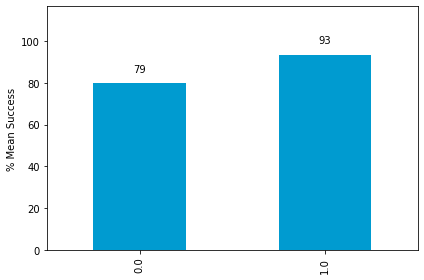

In [9]:
bayesian_ridge.test(bayesian_ridge_model).display()

<br><br>
<br>

# 2.6 Linear Regression

<hr>


<br>

## 2.6.1 Train

In [40]:
lin_regression_model = lin_regression.train()

Elapsed time: 0m 1s
saving model... done


<br>

## 2.6.2 Load Model

In [10]:
lin_regression_model = lin_regression.load_model()

<br>

## 2.6.3 Test

### Performance Metrics and Errors

| Algorithm         |   Accuracy |   Precision |   Recall |    F1 |   Mean Squared Error |   Cross-Entropy |   R^2 |
|-------------------|------------|-------------|----------|-------|----------------------|-----------------|-------|
| Linear Regression |      83.22 |       90.83 |    72.26 | 80.49 |                 0.12 |           0.394 |  0.52 |

### Classification Report


              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85     11353
         1.0       0.91      0.72      0.80     10436

    accuracy                           0.83     21789
   macro avg       0.85      0.83      0.83     21789
weighted avg       0.84      0.83      0.83     21789






### Predictions

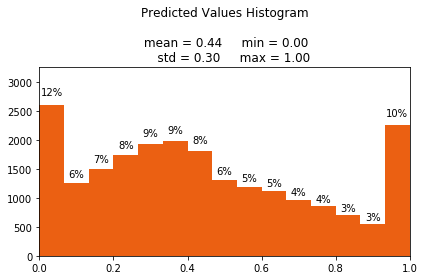

### Predictions Accuracy

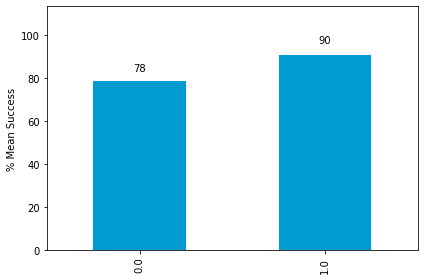

In [11]:
lin_regression.test(lin_regression_model).display()

<br><br>

<br>

# 2.7 Logistic Regression

<hr>

<br>

## 2.7.1 Train

In [41]:
log_regression_model = log_regression.train()

Elapsed time: 0m 4s
saving model... done


<br>

## 2.7.2 Load Model

In [3]:
log_regression_model = log_regression.load_model()

<br>

## 2.7.3 Test

### Performance Metrics and Errors

| Algorithm           |   Accuracy |   Precision |   Recall |    F1 |   Mean Squared Error |   Cross-Entropy |   R^2 |
|---------------------|------------|-------------|----------|-------|----------------------|-----------------|-------|
| Logistic Regression |      85.61 |       88.04 |    80.94 | 84.34 |                0.144 |           4.971 | 0.423 |

### Classification Report


              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87     11353
         1.0       0.88      0.81      0.84     10436

    accuracy                           0.86     21789
   macro avg       0.86      0.85      0.86     21789
weighted avg       0.86      0.86      0.86     21789






### Predictions

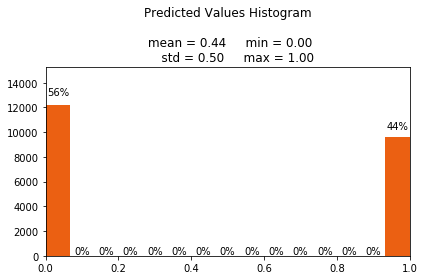

### Predictions Accuracy

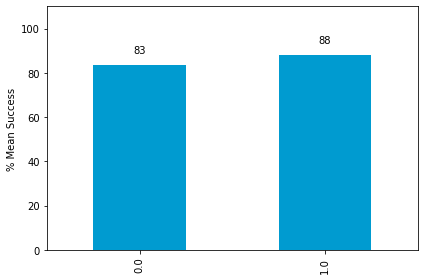

In [8]:
log_regression.test(log_regression_model).display()

<br><br>

<br>

# 3. Summary

<hr>


<br>

## 3.1. Train

In [3]:
magic_loop.train(exclude=[
    "Neural Network",
    "Decision Tree Regressor",
    "Random Forest Regressor",
])

Logistic Regression... 
Elapsed time: 0m 3s
saving model... done
done

Linear Regression... 
Elapsed time: 0m 0s
saving model... done
done

XGBoost Regressor... 
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=21)]: Using backend LokyBackend with 21 concurrent workers.
[Parallel(n_jobs=21)]: Done   5 out of   5 | elapsed:   22.0s finished


Elapsed time: 0m 36s
saving model... done
done

Bayesian Ridge... 
Elapsed time: 0m 1s
saving model... done
done



<br>

## 3.2. Test 

In [ ]:
magic_loop.summary()

Decision Tree Regressor... error
Neural Network... WARNING:tensorflow:From /home/miguel/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<br>


# 4. Feature Importance

<hr>

## Top 10 Feature Importances

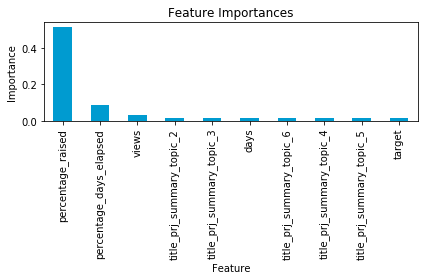

## Feature Importances

| Feature                               |   Importance |
|---------------------------------------|--------------|
| percentage_raised                     |        0.513 |
| percentage_days_elapsed               |        0.089 |
| views                                 |        0.034 |
| title_prj_summary_topic_2             |        0.017 |
| title_prj_summary_topic_3             |        0.015 |
| title_prj_summary_topic_4             |        0.015 |
| title_prj_summary_topic_5             |        0.015 |
| title_prj_summary_topic_6             |        0.015 |
| title_length                          |        0.015 |
| days                                  |        0.015 |
| target                                |        0.015 |
| title_prj_summary_topic_1             |        0.013 |
| title_prj_summary_prob_dominant_topic |        0.013 |
| end_day_sin                           |        0.009 |
| images                                |        0.009 |
| start_day_sin                         |        0.008 |
| raised                                |        0.008 |
| comments                              |        0.008 |
| reward_slot_5_amount                  |        0.008 |
| start_day                             |        0.007 |
| start_day_cos                         |        0.007 |
| backers                               |        0.007 |
| reward_slot_4_amount                  |        0.007 |
| start_month                           |        0.006 |
| end_day                               |        0.006 |
| end_day_cos                           |        0.006 |
| uncond_channel                        |        0.006 |
| reward_slot_3_amount                  |        0.006 |
| reward_slot_6_amount                  |        0.006 |
| start_weekday                         |        0.005 |
| days_elapsed                          |        0.005 |
| end_month                             |        0.004 |
| end_month_sin                         |        0.004 |
| end_month_cos                         |        0.004 |
| reward_slot_1_amount                  |        0.004 |
| reward_slot_1_dominant_topic          |        0.004 |
| reward_slot_2_amount                  |        0.004 |
| reward_slot_2_dominant_topic          |        0.004 |
| title_prj_summary_dominant_topic      |        0.003 |
| channel                               |        0.003 |
| start_month_sin                       |        0.003 |
| start_month_cos                       |        0.003 |
| start_weekday_sin                     |        0.003 |
| start_weekday_cos                     |        0.003 |
| end_weekday_sin                       |        0.003 |
| cat_agro-indústria                    |        0.003 |
| cat_música                            |        0.003 |
| user_n_success_projects               |        0.003 |
| reward_slot_3_dominant_topic          |        0.003 |
| reward_slot_4_dominant_topic          |        0.003 |
| reward_slot_6_dominant_topic          |        0.003 |
| end_weekday                           |        0.002 |
| end_weekday_cos                       |        0.002 |
| cat_desporto                          |        0.002 |
| n_rewards                             |        0.002 |
| reward_slot_5_dominant_topic          |        0.002 |
| amount_self_funded                    |        0.001 |
| percentage_target_self_funded         |        0.001 |
| facebook                              |        0.001 |
| cat_ambiente                          |        0.001 |
| cat_artes_plásticas                   |        0.001 |
| cat_cidadania_/_política              |        0.001 |
| cat_dança/cinema/teatro               |        0.001 |
| cat_educação                          |        0.001 |
| cat_empreendedorismo                  |        0.001 |
| cat_evento                            |        0.001 |
| cat_jogos                             |        0.001 |
| cat_livros/revistas                   |        0.001 |
| cat_moda/design                       |        0.001 |
| cat_outros                            |        0.001 |
| cat_social                            |        0.001 |
| cat_turismo/viagens                   |        0.001 |
| cat_vídeo/fotografia                  |        0.001 |
| cat_zoófila                           |        0.001 |
| user_n_projects                       |        0.001 |
| cat_alimentação/bebidas               |        0     |
| cat_ciência/tecnologia                |        0     |
| reward_slot_1_prob_dominant_topic     |        0     |
| reward_slot_1_topic_1                 |        0     |
| reward_slot_1_topic_2                 |        0     |
| reward_slot_1_topic_3                 |        0     |
| reward_slot_1_topic_4                 |        0     |
| reward_slot_1_topic_5                 |        0     |
| reward_slot_2_prob_dominant_topic     |        0     |
| reward_slot_2_topic_1                 |        0     |
| reward_slot_2_topic_2                 |        0     |
| reward_slot_2_topic_3                 |        0     |
| reward_slot_2_topic_4                 |        0     |
| reward_slot_2_topic_5                 |        0     |
| reward_slot_3_prob_dominant_topic     |        0     |
| reward_slot_3_topic_1                 |        0     |
| reward_slot_3_topic_2                 |        0     |
| reward_slot_3_topic_3                 |        0     |
| reward_slot_3_topic_4                 |        0     |
| reward_slot_3_topic_5                 |        0     |
| reward_slot_4_prob_dominant_topic     |        0     |
| reward_slot_4_topic_1                 |        0     |
| reward_slot_4_topic_2                 |        0     |
| reward_slot_4_topic_3                 |        0     |
| reward_slot_4_topic_4                 |        0     |
| reward_slot_4_topic_5                 |        0     |
| reward_slot_5_prob_dominant_topic     |        0     |
| reward_slot_5_topic_1                 |        0     |
| reward_slot_5_topic_2                 |        0     |
| reward_slot_5_topic_3                 |        0     |
| reward_slot_5_topic_4                 |        0     |
| reward_slot_5_topic_5                 |        0     |
| reward_slot_6_prob_dominant_topic     |        0     |
| reward_slot_6_topic_1                 |        0     |
| reward_slot_6_topic_2                 |        0     |
| reward_slot_6_topic_3                 |        0     |
| reward_slot_6_topic_4                 |        0     |
| reward_slot_6_topic_5                 |        0     |

In [31]:
from dskc import dskc_modeling
from src.modeling.models import *
from src.modeling import util

# get feature names
_, _, feature_names = util.read_train_data()

# set model
model = random_forest_regressor.load_model()

# feature importance
dskc_modeling.get_features_importance(model, feature_names)


<br>

# 5. Error along Time

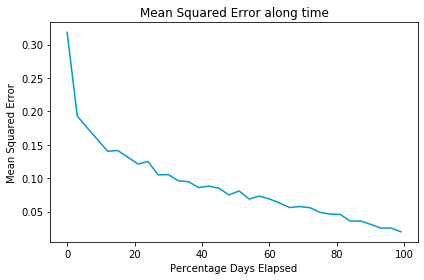

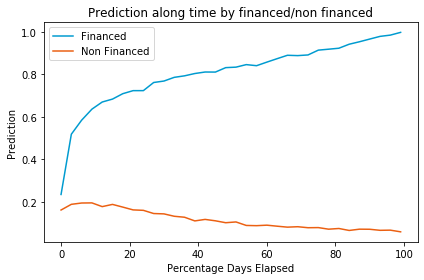

In [32]:
visualization.by_variable(nnet,"percentage_days_elapsed",jump=0.03)

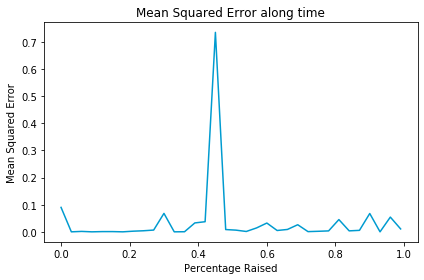

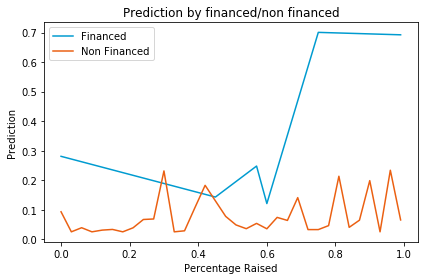

In [106]:
visualization.by_variable(nnet,"percentage_raised",jump=0.03)

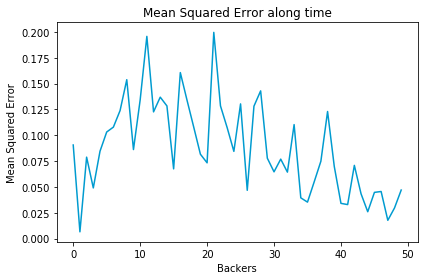

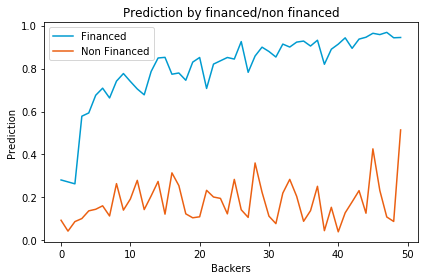

In [108]:
visualization.by_variable(nnet,"backers",jump=1,max_pos=50)

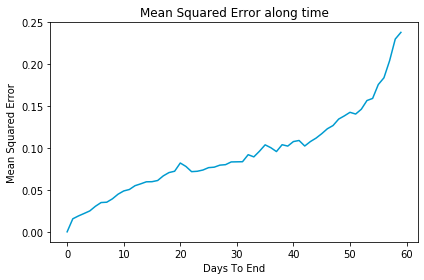

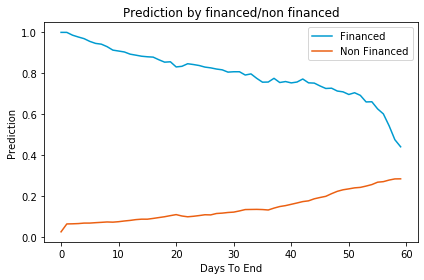

In [107]:
visualization.by_variable(nnet,"days_elapsed",jump=1,max_pos=60)